# Assignment : switchon.io

**importing** **necessary** **libraries**

In [0]:
import numpy as np
import pandas as pd

**Mounting google colab with drive for faster results**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the .txt file 

In [0]:
X = np.loadtxt("/content/drive/My Drive/switchon/X_AXIS.txt")
Y = np.loadtxt("/content/drive/My Drive/switchon/Y_AXIS.txt")
Z = np.loadtxt("/content/drive/My Drive/switchon/Z_AXIS.txt")

In [4]:
X.shape, Y.shape, Z.shape

((1805, 350), (1805, 350), (1805, 350))

# Making dataframe with all X, Y, Z axis dataframe 
#then splitting it into train and test
#then merging all train and test data

**Here I merged all splitted and merged all train and test data so that while during final prediction, I will be having test data of all the axis**

*Here I have checked nan values before working*

In [5]:
X = pd.DataFrame(X)
X.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349
0,0.156906,0.235360,0.156906,0.156906,0.000000,0.392266,0.078453,0.470719,0.156906,0.078453,0.235360,0.235360,0.000000,0.313813,0.235360,0.156906,0.235360,0.392266,0.000000,0.000000,0.235360,-0.078453,0.313813,0.313813,0.156906,0.235360,0.156906,0.235360,0.000000,0.078453,0.23536,0.23536,0.000000,0.470719,0.156906,0.156906,0.000000,0.156906,0.470719,0.000000,...,0.078453,0.0,0.156906,0.000000,0.078453,0.313813,0.313813,0.235360,0.000000,0.235360,0.549172,0.23536,0.078453,0.00000,0.156906,0.078453,0.000000,0.313813,0.470719,0.235360,0.00000,0.078453,0.156906,0.156906,0.156906,0.000000,0.235360,0.313813,0.000000,0.078453,0.313813,0.156906,0.078453,0.156906,0.000000,0.235360,0.000000,0.235360,0.235360,0.000000
1,0.000000,0.235360,-0.235360,0.000000,0.078453,0.156906,0.078453,0.000000,0.078453,0.235360,0.078453,0.156906,0.235360,0.235360,0.000000,0.235360,0.078453,0.000000,0.313813,0.156906,0.235360,0.156906,0.000000,0.235360,0.000000,0.156906,-0.156906,0.235360,0.156906,0.000000,0.23536,0.23536,0.156906,0.000000,0.156906,0.235360,0.156906,0.000000,0.313813,0.156906,...,0.078453,0.0,0.235360,0.078453,0.156906,0.313813,0.000000,0.000000,0.235360,0.235360,0.549172,0.23536,0.235360,0.23536,0.078453,0.313813,0.235360,0.313813,0.235360,0.313813,0.23536,0.000000,0.313813,0.392266,0.392266,0.313813,0.078453,0.000000,0.313813,0.078453,0.549172,0.392266,0.470719,0.000000,0.392266,0.392266,0.078453,0.235360,0.156906,0.000000
2,0.627626,0.156906,0.156906,0.549172,0.392266,0.235360,0.470719,0.392266,0.235360,0.235360,0.235360,0.235360,0.313813,0.000000,0.156906,0.078453,0.156906,0.392266,0.000000,0.000000,0.627626,0.235360,0.000000,0.392266,0.235360,0.156906,0.000000,0.156906,0.156906,0.235360,0.23536,0.23536,0.392266,0.000000,0.000000,0.235360,0.000000,0.156906,0.313813,0.235360,...,0.156906,0.0,0.235360,0.235360,0.156906,0.392266,0.000000,0.470719,0.156906,0.078453,0.000000,0.00000,0.313813,0.00000,0.313813,0.078453,0.313813,0.078453,0.000000,0.392266,0.00000,0.235360,0.078453,0.000000,0.000000,0.078453,0.000000,0.392266,0.156906,0.078453,0.392266,0.156906,0.000000,0.156906,0.000000,0.078453,0.078453,0.313813,0.078453,0.078453


In [6]:
Y = pd.DataFrame(Y)
Y.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349
0,0.306079,0.149172,0.462985,0.541438,0.462985,0.384532,0.541438,-0.243094,0.776798,0.070719,0.698345,0.619892,0.149172,0.306079,0.541438,0.384532,0.541438,0.462985,0.462985,0.384532,0.619892,0.306079,0.149172,0.541438,0.149172,0.384532,0.698345,0.306079,0.619892,-0.007734,0.227626,0.698345,0.462985,0.541438,0.541438,-0.007734,0.462985,0.306079,0.149172,0.619892,...,0.462985,0.384532,0.227626,0.619892,0.306079,0.462985,0.149172,0.541438,0.227626,-0.007734,0.541438,0.149172,0.698345,0.698345,0.070719,0.541438,0.227626,-0.086187,0.698345,0.149172,0.227626,0.619892,0.227626,0.541438,0.698345,0.306079,0.384532,0.306079,0.933704,0.070719,0.462985,0.462985,0.227626,0.227626,0.306079,0.855251,0.541438,0.149172,0.541438,0.149172
1,0.149172,0.462985,0.384532,0.227626,0.462985,0.306079,0.619892,0.227626,0.619892,-0.007734,0.227626,0.462985,0.462985,0.306079,0.227626,0.306079,0.306079,0.227626,0.619892,0.462985,0.384532,0.462985,0.619892,0.149172,0.462985,0.306079,0.462985,0.541438,0.619892,0.541438,0.384532,0.541438,0.070719,0.541438,0.462985,0.306079,0.776798,0.384532,0.462985,0.384532,...,0.776798,0.462985,0.462985,0.384532,0.227626,0.619892,0.227626,-0.086187,0.227626,0.462985,-0.007734,0.619892,0.306079,0.462985,0.776798,0.462985,0.306079,0.227626,0.541438,0.070719,0.462985,0.306079,0.306079,0.541438,0.070719,0.541438,0.306079,0.070719,0.776798,0.227626,0.384532,0.462985,0.306079,0.462985,0.384532,0.384532,0.462985,0.227626,0.384532,0.070719
2,-0.007734,0.462985,-0.007734,0.306079,0.384532,0.384532,0.227626,0.384532,0.462985,0.227626,0.541438,0.227626,0.306079,0.384532,0.306079,0.698345,-0.164640,0.698345,0.776798,0.070719,0.541438,0.462985,0.070719,0.541438,0.070719,0.306079,0.306079,0.306079,0.541438,0.149172,0.776798,0.149172,0.541438,0.149172,0.227626,0.541438,0.306079,0.070719,0.855251,0.227626,...,0.619892,0.227626,0.384532,0.227626,0.227626,0.541438,0.149172,0.619892,0.698345,0.227626,0.541438,0.541438,0.384532,0.306079,0.384532,0.698345,0.462985,0.698345,0.306079,0.541438,0.306079,0.070719,0.698345,0.306079,0.227626,0.541438,0.227626,0.541438,0.541438,0.306079,0.462985,0.619892,0.149172,0.698345,0.462985,0.462985,0.149172,0.698345,0.306079,0.070719


In [7]:
Z = pd.DataFrame(Z)
Z.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349
0,9.887478,10.122840,10.04438,10.044380,9.965931,9.887478,9.809024,10.122840,9.495212,10.436650,9.730571,9.887478,10.27974,10.044380,10.12284,10.044380,9.652118,10.279740,9.495212,9.965931,10.201290,9.730571,10.201290,9.652118,10.358200,9.652118,9.495212,10.358200,9.338305,9.887478,10.515100,9.495212,10.201290,9.652118,9.730571,10.279740,9.652118,9.965931,10.279740,9.730571,...,9.730571,9.495212,9.730571,9.809024,10.20129,9.730571,10.044380,9.652118,9.887478,10.436650,9.495212,10.201290,9.495212,9.495212,9.887478,10.122840,9.730571,10.201290,9.573665,9.965931,10.436650,9.338305,10.044380,9.887478,9.887478,10.358200,9.809024,9.887478,9.495212,10.358200,9.809024,9.809024,10.27974,9.495212,10.20129,9.416759,9.573665,10.515100,9.809024,9.965931
1,10.201290,9.416759,10.20129,10.201290,9.730571,9.887478,9.887478,10.122840,9.652118,10.279740,10.122840,9.730571,10.27974,9.573665,10.20129,10.122840,9.495212,10.044380,9.809024,9.809024,10.122840,9.730571,9.809024,10.279740,9.338305,10.201290,9.652118,10.358200,9.652118,9.730571,9.887478,9.495212,9.730571,9.652118,9.809024,10.044380,9.495212,10.122840,9.495212,9.887478,...,9.652118,10.122840,9.730571,9.809024,10.12284,9.495212,9.730571,10.044380,9.809024,9.887478,9.965931,9.573665,10.436650,9.730571,10.436650,9.809024,9.965931,9.652118,9.809024,10.279740,9.730571,9.809024,9.809024,9.730571,10.436650,9.652118,10.201290,10.279740,9.887478,9.965931,10.201290,9.652118,10.43665,9.730571,10.12284,10.122840,9.652118,9.965931,9.730571,10.201290
2,9.809024,10.044380,10.20129,9.730571,10.279740,9.730571,10.122840,9.887478,10.122840,9.730571,9.652118,10.358200,10.04438,9.887478,10.75046,9.338305,10.515100,9.495212,9.730571,10.358200,9.887478,9.809024,10.201290,9.887478,10.358200,9.495212,9.965931,9.652118,10.044380,10.044380,9.495212,10.515100,9.730571,10.201290,10.358200,9.652118,10.279740,10.122840,9.573665,10.436650,...,9.102945,10.201290,9.573665,10.515100,10.12284,9.495212,10.201290,10.122840,9.416759,10.279740,9.652118,9.573665,9.965931,9.809024,10.122840,9.495212,10.358200,9.887478,9.965931,9.652118,9.652118,10.358200,9.887478,9.887478,10.358200,9.652118,9.652118,9.887478,9.573665,10.122840,9.887478,9.809024,10.20129,9.416759,10.27974,9.887478,9.965931,9.809024,10.201290,10.279740


In [0]:
from sklearn.model_selection import train_test_split
X_tr, X_te = train_test_split(X, test_size=0.2)
Y_tr, Y_te = train_test_split(Y, test_size=0.2)
Z_tr, Z_te = train_test_split(Z, test_size=0.2)


In [0]:
frames1 = [X_tr, Y_tr, Z_tr]
frames2 = [X_te, Y_te, Z_te]


In [0]:
train = pd.concat(frames1)
test = pd.concat(frames2)

In [11]:
train.shape, test.shape

((4332, 350), (1083, 350))

In [0]:
train = train.values
test = test.values

In [13]:
train.shape

(4332, 350)

**Normalising train and test to get the better result and to get the plots in certain range**

In [0]:
from sklearn.preprocessing import normalize
train=normalize(train)
test = normalize(test)

**Importing necessary libraries**

In [15]:
from sklearn.cluster import KMeans
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


**Preparing an LSTM**\
**Here I have not used any dense network because our model can easily overfit, because of less data**\

# Here I am using Lstm because it can easily handle time series data

**Reshaping train and test to fit in lstm**

In [0]:
train1 = np.reshape(train, train.shape + (1,))
test1 = np.reshape(test, test.shape + (1,))

In [17]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Sequential

# define model
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(350,1)))
model.add(RepeatVector(350))
model.add(LSTM(30, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))


W0628 09:24:16.565880 140622553593728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 09:24:16.602134 140622553593728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 09:24:16.607642 140622553593728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')
# fit model
model.fit(train1, train1, epochs=10,
          #batch_size=10,
          shuffle=True,
          steps_per_epoch=20,
          validation_steps=20,
          validation_data=(test1, test1))
                

W0628 09:24:17.113597 140622553593728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 09:24:17.144551 140622553593728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0628 09:24:17.153411 140622553593728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0628 09:24:18.998081 140622553593728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 4332 samples, validate on 1083 samples
Epoch 1/10
20/20 [==============================] - 48s 2s/step - loss: 0.2178 - val_loss: 0.1786
Epoch 2/10
20/20 [==============================] - 45s 2s/step - loss: 0.1776 - val_loss: 0.1774
Epoch 3/10
20/20 [==============================] - 45s 2s/step - loss: 0.1773 - val_loss: 0.1773
Epoch 4/10
20/20 [==============================] - 45s 2s/step - loss: 0.1771 - val_loss: 0.1771
Epoch 5/10
20/20 [==============================] - 45s 2s/step - loss: 0.1769 - val_loss: 0.1770
Epoch 6/10
20/20 [==============================] - 45s 2s/step - loss: 0.1768 - val_loss: 0.1768
Epoch 7/10
20/20 [==============================] - 45s 2s/step - loss: 0.1766 - val_loss: 0.1766
Epoch 8/10
20/20 [==============================] - 45s 2s/step - loss: 0.1765 - val_loss: 0.1767
Epoch 9/10
20/20 [==============================] - 45s 2s/step - loss: 0.1765 - val_loss: 0.1766
Epoch 10/10
20/20 [==============================] - 45s 2s/step - los

In [0]:
predicted = model.predict(test1)

In [0]:
predicted = np.reshape(predicted, (1083, 350))

# Here in this section I am predicting test data and then clustering it into 2 different clusters
**Since data is taken from a machince**\
**So here I am assuming that most of the time it is in working mode and is idle for few time**
**To cluster them into two groups, I plot different graph(Here showing only two)**\
**In these two graphs we can see see that there is a significant fifference in magnitude(y_axis)**\
**So here we can see that highest magnitude of graph1 is 0.0325**\
**and for graph 2 is  0.05, so we can say that these two graphs represents 2 different cluster**\

**Since there are 350 columns in each row**\
*So,  I am taking addition of 0.038(threshold) 350 times(sum1)*
**If final sum<=sum1  value belong to ** cluster0(idle)**  else **cluster1(production mode)** 

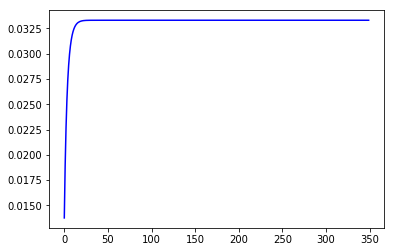

In [61]:
import matplotlib.pyplot as plt
plt.plot(predicted[23], color="blue")
plt.show()

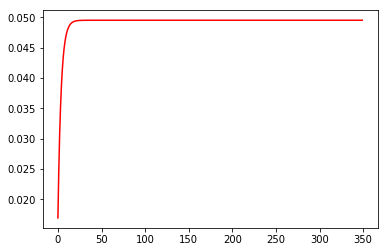

In [22]:
import matplotlib.pyplot as plt
plt.plot(predicted[8], color="red")
plt.show()

In [0]:
sum1 = 0
for i in range(350):
  sum1+=0.038 

In [57]:
sum1

13.300000000000054

In [0]:
clstr_1 = []
clstr_0 = []
index_1 = []
index_0 = []
for i in range(1083):
  sum=0
  for j in range(350):
    if predicted[i][j]:
      sum+=predicted[i][j]
  
  if sum<=sum1:
    clstr_0.append(0)
    index_0.append(i)
  else:
    clstr_1.append(1)
    index_1.append(i)
  

In [59]:
len(clstr_0), len(clstr_1)

(93, 990)

In [62]:
index_0

[23,
 31,
 34,
 47,
 59,
 62,
 64,
 67,
 69,
 76,
 81,
 85,
 88,
 91,
 97,
 105,
 121,
 132,
 133,
 142,
 145,
 150,
 152,
 153,
 157,
 160,
 163,
 173,
 179,
 181,
 190,
 193,
 194,
 206,
 212,
 213,
 221,
 226,
 227,
 234,
 239,
 247,
 253,
 254,
 258,
 259,
 271,
 275,
 277,
 278,
 281,
 283,
 305,
 306,
 314,
 321,
 331,
 334,
 335,
 336,
 353,
 364,
 379,
 397,
 411,
 415,
 428,
 442,
 443,
 458,
 471,
 480,
 486,
 504,
 506,
 512,
 527,
 536,
 558,
 565,
 607,
 615,
 632,
 635,
 647,
 655,
 658,
 686,
 688,
 707,
 713,
 830,
 895]

In [63]:
index_1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 63,
 65,
 66,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 86,
 87,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 146,
 147,
 148,
 149,
 151,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 21

**Preparing an Autoencoder**\
**Here I have not used any dense network because our model can easily overfit, because of less data**\

In [0]:
# this is our input placeholder
input_img = Input(shape=(350,))
# "encoded" is the encoded representation of the input
encoded = Dense(2, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(350, activation='sigmoid')(encoded)



In [30]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(train, train,
                epochs=30,
                batch_size=10,
                shuffle=True,
                validation_data=(test, test))
                

Train on 4332 samples, validate on 1083 samples
Epoch 1/30
4332/4332 [==============================] - 2s 569us/step - loss: 0.3808 - val_loss: 0.1908
Epoch 2/30
4332/4332 [==============================] - 2s 452us/step - loss: 0.1886 - val_loss: 0.1882
Epoch 3/30
4332/4332 [==============================] - 2s 461us/step - loss: 0.1864 - val_loss: 0.1861
Epoch 4/30
4332/4332 [==============================] - 2s 454us/step - loss: 0.1846 - val_loss: 0.1843
Epoch 5/30
4332/4332 [==============================] - 2s 453us/step - loss: 0.1829 - val_loss: 0.1826
Epoch 6/30
4332/4332 [==============================] - 2s 451us/step - loss: 0.1814 - val_loss: 0.1811
Epoch 7/30
4332/4332 [==============================] - 2s 454us/step - loss: 0.1802 - val_loss: 0.1799
Epoch 8/30
4332/4332 [==============================] - 2s 450us/step - loss: 0.1791 - val_loss: 0.1789
Epoch 9/30
4332/4332 [==============================] - 2s 453us/step - loss: 0.1782 - val_loss: 0.1780
Epoch 10/30
4332

**In the above results we can see that training and validation is almost similar**

**In this section , i am visualizing  the two dimensions, just to to check if how model is retaining features in 2 dimensions**

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_real = encoder.predict(test)

In [33]:
encoded_real.shape

(1083, 2)

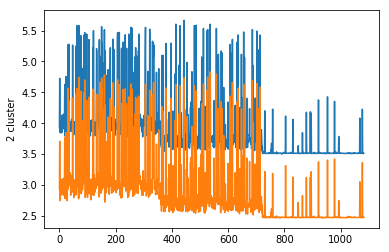

In [34]:
import matplotlib.pyplot as plt
plt.plot(encoded_real)
plt.ylabel('2 cluster')
plt.show()

# Here in this section I am predicting test data and then clustering it into 2 different clusters
**Since data is taken from a machince**\
**So here I am assuming that most of the time it is in working mode and is idle for few time**
**To cluster them into two groups, I plot different graph(Here showing only two)**\
**In these two graphs we can see see that there is a significant fifference in magnitude(y_axis)**\
**So here we can see that highest magnitude of graph1 is 0.025 **\
**and for graph 2 is  0.0415, so we can say that these two graphs represents 2 different cluster**\

**Since there are 350 columns in each row**\
*So,  I am taking addition of 0.03(threshold) 350 times(sum1)*
**If final sum<=sum1  value belong to ** cluster0(idle)**  else **cluster1(production mode)** 

In [0]:
decoded_val = autoencoder.predict(test)



In [36]:
decoded_val.shape

(1083, 350)

**graph1**

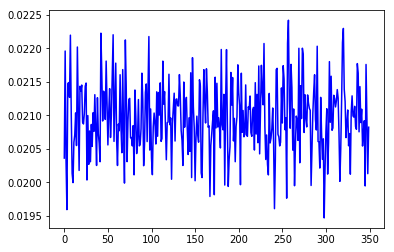

In [64]:
plt.plot(decoded_val[1], color="blue")
plt.show()

**graph2**

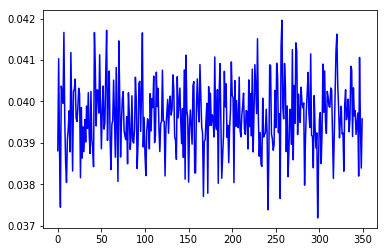

In [38]:
plt.plot(decoded_val[8], color="blue")
plt.show()

In [0]:
sum1 = 0
for i in range(350):
  sum1+=0.03 

In [40]:
sum1

10.499999999999968

In [0]:
clstr_1 = []
clstr_0 = []
index_1 = []
index_0 = []
for i in range(1083):
  sum=0
  for j in range(350):
    if decoded_val[i][j]:
      sum+=decoded_val[i][j]
  
  if sum<=sum1:
    clstr_0.append(0)
    index_0.append(i)
  else:
    clstr_1.append(1)
    index_1.append(i)
  

In [42]:
len(clstr_0), len(clstr_1)

(138, 945)

# These are the index of idle(cluster_0) and production(clister_1) mode.

In [43]:
index_0

[1,
 19,
 23,
 31,
 34,
 47,
 59,
 62,
 64,
 67,
 69,
 76,
 81,
 85,
 87,
 88,
 89,
 90,
 91,
 95,
 97,
 105,
 119,
 121,
 132,
 133,
 142,
 145,
 150,
 152,
 157,
 160,
 163,
 170,
 173,
 179,
 180,
 181,
 190,
 193,
 194,
 206,
 207,
 212,
 213,
 221,
 226,
 227,
 228,
 234,
 237,
 239,
 247,
 250,
 253,
 254,
 257,
 258,
 259,
 266,
 268,
 271,
 275,
 277,
 278,
 281,
 283,
 305,
 306,
 314,
 321,
 331,
 334,
 335,
 336,
 345,
 353,
 364,
 369,
 379,
 397,
 411,
 414,
 415,
 425,
 428,
 442,
 443,
 454,
 466,
 468,
 471,
 479,
 480,
 481,
 486,
 504,
 506,
 508,
 512,
 525,
 527,
 529,
 536,
 550,
 558,
 561,
 562,
 565,
 566,
 575,
 576,
 578,
 584,
 586,
 599,
 607,
 608,
 613,
 615,
 632,
 635,
 647,
 651,
 655,
 658,
 666,
 676,
 686,
 688,
 696,
 702,
 707,
 713,
 921,
 953,
 978,
 1077]

In [44]:
index_1

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 63,
 65,
 66,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 86,
 92,
 93,
 94,
 96,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 146,
 147,
 148,
 149,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 225,
 229,
 2

# Just to check if my model is working good or not I tried kmeans clustering and found that model working good because both mosel gives almost similar number of (idle) and (production) cluster.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_jobs=-1).fit(train)


In [0]:
pred = kmeans.predict(test)

In [0]:
cluster1 = []
cluster0 = []

for i in range(1083):
    if kmeans.labels_[i] == 0:
        cluster1.append(test[i])
    elif kmeans.labels_[i] == 1:
        cluster0.append(test[i])

**total cluster values**

In [48]:
len(cluster0), len(cluster1)

(261, 822)

In [0]:
clstr_array_0 = np.array(cluster0)
clstr_array_1 = np.array(cluster1)

In [50]:
clstr_array_0[0]

array([ 0.02099334,  0.        ,  0.        ,  0.06298029,  0.        ,
        0.04198668,  0.        , -0.04198668,  0.10496697,  0.        ,
        0.        ,  0.02099334,  0.06298029,  0.04198668,  0.02099334,
        0.10496697,  0.04198668,  0.02099334,  0.02099334,  0.06298029,
        0.04198668,  0.        ,  0.        ,  0.        ,  0.        ,
        0.08397363,  0.02099334,  0.        ,  0.06298029,  0.08397363,
        0.04198668,  0.08397363,  0.        ,  0.06298029,  0.04198668,
        0.        ,  0.04198668,  0.04198668,  0.04198668,  0.04198668,
        0.04198668,  0.06298029,  0.        ,  0.06298029,  0.02099334,
        0.06298029,  0.06298029,  0.        ,  0.12596031,  0.        ,
        0.02099334,  0.04198668,  0.04198668,  0.06298029,  0.        ,
        0.        ,  0.10496697,  0.06298029,  0.04198668,  0.10496697,
        0.        ,  0.08397363,  0.02099334,  0.08397363,  0.02099334,
        0.04198668,  0.        ,  0.06298029,  0.06298029,  0.  

In [0]:
merged = np.concatenate( [ clstr_array_0, clstr_array_1] , axis = 0)

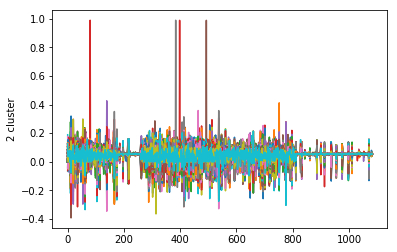

In [52]:
import matplotlib.pyplot as plt
plt.plot(merged)
plt.ylabel('2 cluster')
plt.show()

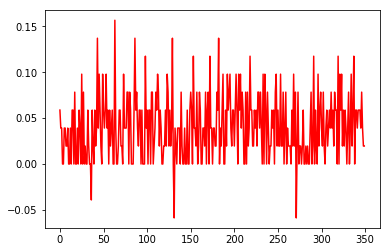

In [53]:
plt.plot(clstr_array_1[0], color="red")
plt.show()

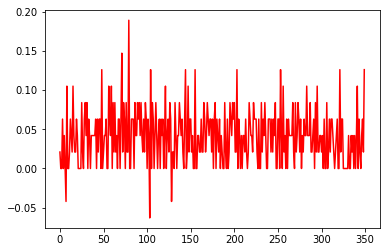

In [54]:
plt.plot(clstr_array_0[0], color="red")
plt.show()

In [65]:
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists
from prettytable import PrettyTable

x=PrettyTable()
x.field_names = ["Model", "idle", "production"]

x.add_row(["LSTM", "93", "990"])

x.add_row(["Autoencoder", "138", "945"])

x.add_row(["Kmeans", "261", "822"])


print(x)


+-------------+------+------------+
|    Model    | idle | production |
+-------------+------+------------+
|     LSTM    |  93  |    990     |
| Autoencoder | 138  |    945     |
|    Kmeans   | 261  |    822     |
+-------------+------+------------+
